In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [4]:
# Load your boston.csv file
# Make sure the boston.csv file is in the same folder as your notebook
df = pd.read_csv('boston.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows to understand the structure
print("\nFirst 5 rows:")
display(df.head())

# Check for any missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print(f"\nDataset statistics:")
display(df.describe())

Dataset loaded successfully!
Shape: (506, 14)
Columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

First 5 rows:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



Missing values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Dataset statistics:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# We need to identify which column is the target (price)
print("Available columns:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Common target column names for Boston housing
possible_targets = ['price', 'target', 'medv', 'MEDV', 'Price', 'TARGET']
target_col = None

for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col:
    print(f"\nFound target column: '{target_col}'")
    y = df[target_col]
    X = df.drop(columns=[target_col])
else:
    print("\nCouldn't automatically detect target column.")
    print("Please tell me which column is the house price/target.")
    print("Available columns:", list(df.columns))
    
    # For now, let's assume the last column is the target
    target_col = df.columns[-1]
    print(f"Assuming '{target_col}' is the target column")
    y = df[target_col]
    X = df.drop(columns=[target_col])

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Features: {list(X.columns)}")

Available columns:
0: crim
1: zn
2: indus
3: chas
4: nox
5: rm
6: age
7: dis
8: rad
9: tax
10: ptratio
11: black
12: lstat
13: medv

Found target column: 'medv'

Features shape: (506, 13)
Target shape: (506,)
Features: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


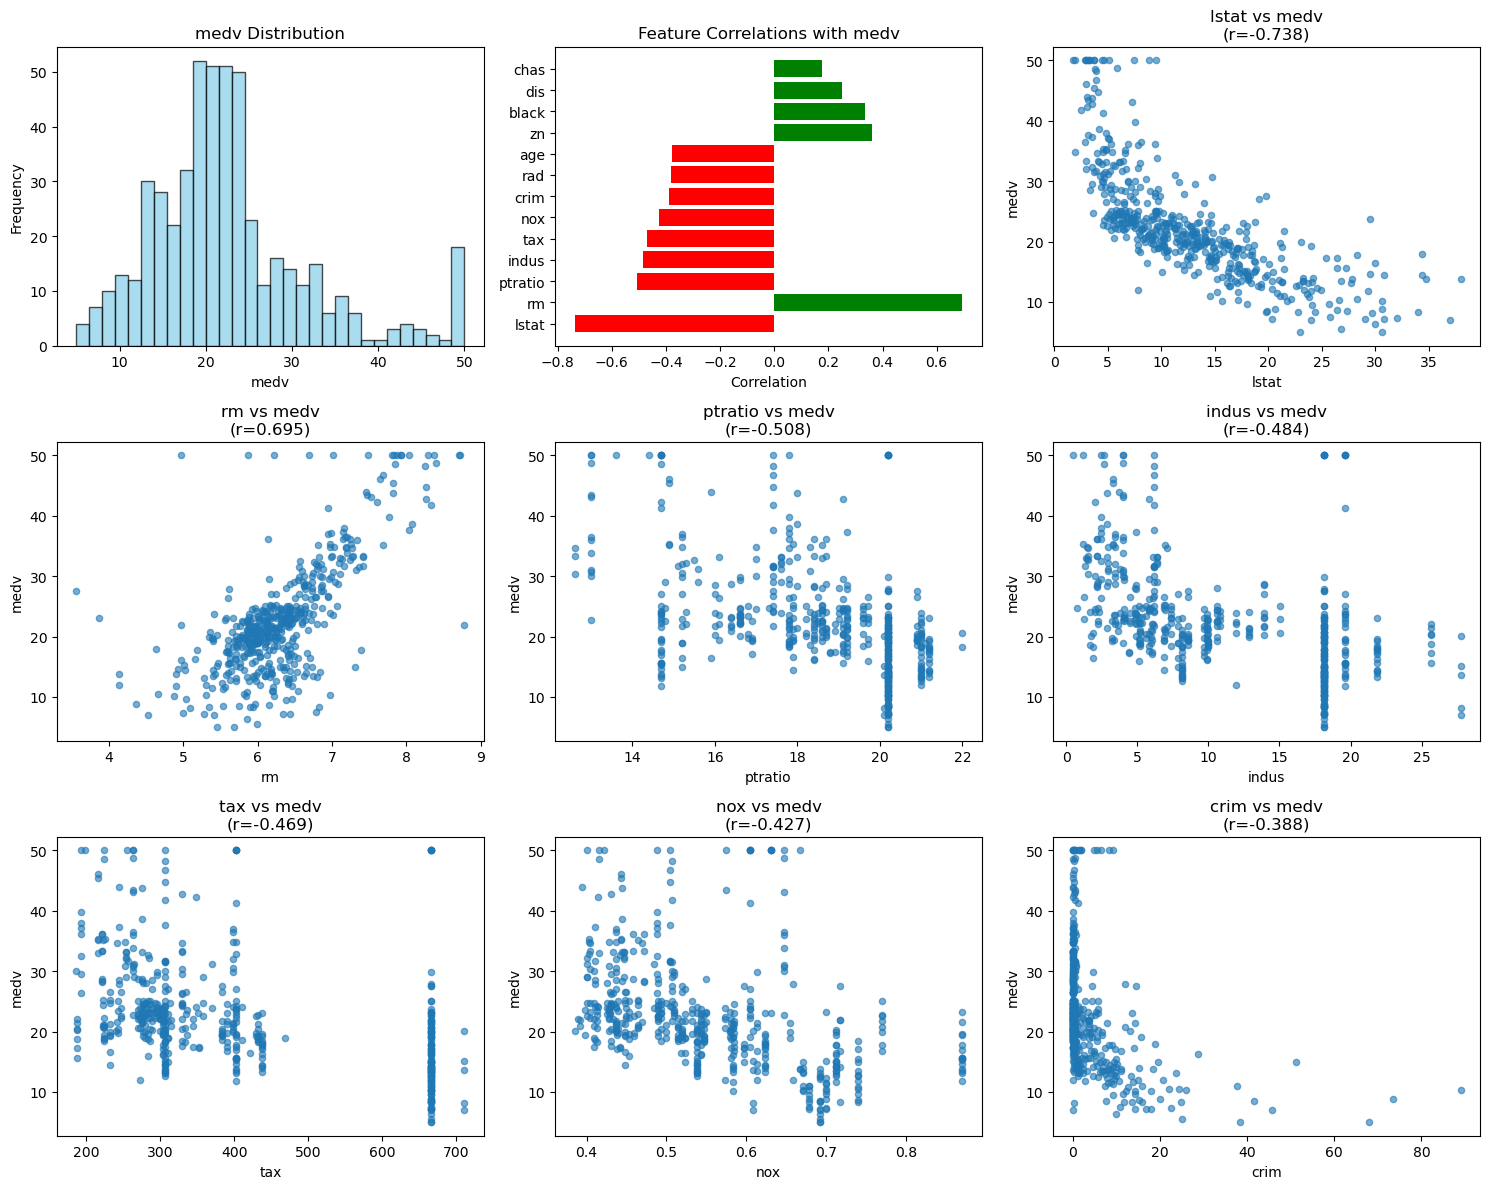

Feature correlations with target:
lstat     -0.738
rm         0.695
ptratio   -0.508
indus     -0.484
tax       -0.469
nox       -0.427
crim      -0.388
rad       -0.382
age       -0.377
zn         0.360
black      0.333
dis        0.250
chas       0.175
dtype: float64


In [6]:
# Explore your Boston housing data
plt.figure(figsize=(15, 12))

# Plot 1: Target distribution
plt.subplot(3, 3, 1)
plt.hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'{target_col} Distribution')
plt.xlabel(f'{target_col}')
plt.ylabel('Frequency')

# Plot 2: Correlation matrix
plt.subplot(3, 3, 2)
# Calculate correlations with target
correlations = X.corrwith(y).sort_values(key=abs, ascending=False)
colors = ['green' if x > 0 else 'red' for x in correlations.values]
plt.barh(range(len(correlations)), correlations.values, color=colors)
plt.yticks(range(len(correlations)), correlations.index)
plt.title(f'Feature Correlations with {target_col}')
plt.xlabel('Correlation')

# Plot 3-9: Top correlated features vs target
top_features = correlations.abs().head(7).index
for i, feature in enumerate(top_features):
    plt.subplot(3, 3, i+3)
    plt.scatter(X[feature], y, alpha=0.6, s=20)
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.title(f'{feature} vs {target_col}')
    
    # Add correlation value to title
    corr_val = correlations[feature]
    plt.title(f'{feature} vs {target_col}\n(r={corr_val:.3f})')

plt.tight_layout()
plt.show()

# Print correlation table
print("Feature correlations with target:")
print(correlations.round(3))

In [7]:
from sklearn.metrics import r2_score
import numpy as np

In [8]:
# Here's where MLOps problems start appearing!
print(f"Training model to predict {target_col}")
print("="*50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # What if you change this random_state?
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("\nMODEL RESULTS:")
print("-" * 30)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE:  {test_mse:.4f}")
print(f"Training R²:  {train_r2:.4f}")
print(f"Testing R²:   {test_r2:.4f}")

# Calculate RMSE for easier interpretation
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(f"\nTraining RMSE: {train_rmse:.4f}")
print(f"Testing RMSE:  {test_rmse:.4f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\nTop 5 Most Important Features:")
print(feature_importance.head().round(4))

# Save the model (but where? what version?)
model_filename = f'boston_housing_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl'
joblib.dump(model, model_filename)
print(f"\nModel saved as '{model_filename}'")

Training model to predict medv
Training set size: 404 samples
Test set size: 102 samples

MODEL RESULTS:
------------------------------
Training MSE: 21.6414
Testing MSE:  24.2911
Training R²:  0.7509
Testing R²:   0.6688

Training RMSE: 4.6520
Testing RMSE:  4.9286

Top 5 Most Important Features:
    feature  coefficient
4       nox     -17.2026
5        rm       4.4388
3      chas       2.7844
7       dis      -1.4479
10  ptratio      -0.9155

Model saved as 'boston_housing_model_20250928_143909.pkl'


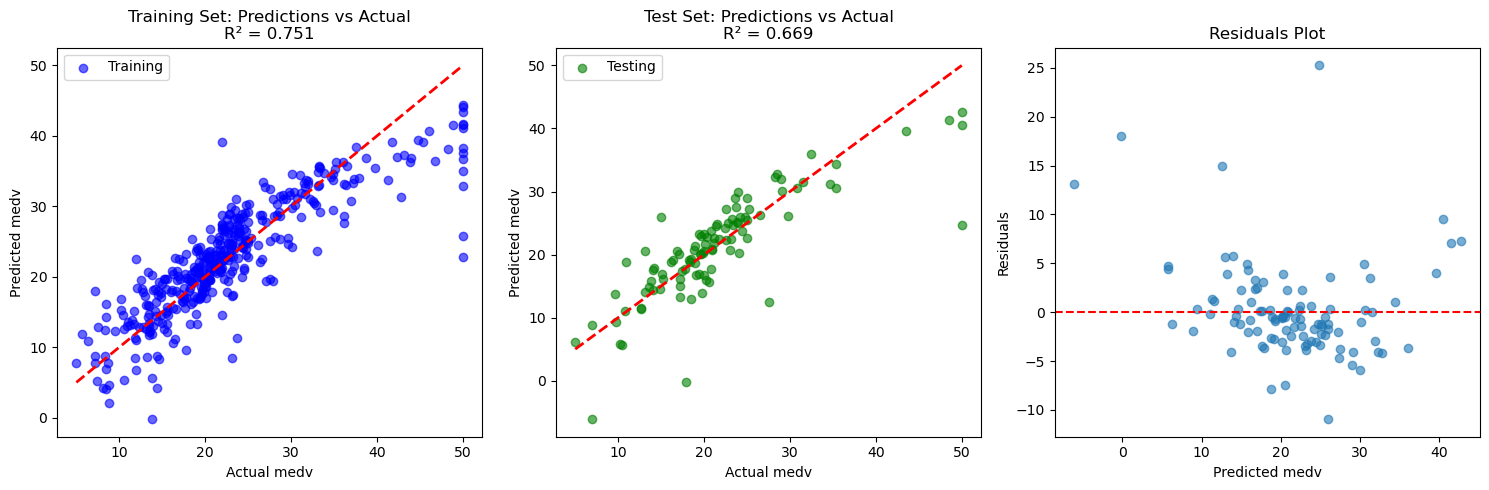

Error Analysis:
Mean Absolute Error: 3.1891
Max Error: 25.2604
Min Error: 0.0263


In [9]:
# Plot predictions vs actual
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, train_pred, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel(f'Actual {target_col}')
plt.ylabel(f'Predicted {target_col}')
plt.title(f'Training Set: Predictions vs Actual\nR² = {train_r2:.3f}')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test, test_pred, alpha=0.6, color='green', label='Testing')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel(f'Actual {target_col}')
plt.ylabel(f'Predicted {target_col}')
plt.title(f'Test Set: Predictions vs Actual\nR² = {test_r2:.3f}')
plt.legend()

plt.subplot(1, 3, 3)
# Residuals plot
residuals = y_test - test_pred
plt.scatter(test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel(f'Predicted {target_col}')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

# Error analysis
print("Error Analysis:")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test - test_pred)):.4f}")
print(f"Max Error: {np.max(np.abs(y_test - test_pred)):.4f}")
print(f"Min Error: {np.min(np.abs(y_test - test_pred)):.4f}")

In [10]:
# Let's create a summary of our "experiment"
experiment_summary = {
    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'dataset': 'boston.csv',
    'target_column': target_col,
    'features_count': len(X.columns),
    'samples_count': len(df),
    'train_test_split': '80/20',
    'random_state': 42,
    'model_type': 'LinearRegression',
    'train_r2': train_r2,
    'test_r2': test_r2,
    'train_rmse': train_rmse,
    'test_rmse': test_rmse,
    'model_file': model_filename
}

print("EXPERIMENT SUMMARY:")
print("=" * 50)
for key, value in experiment_summary.items():
    print(f"{key}: {value}")

EXPERIMENT SUMMARY:
timestamp: 2025-09-28 14:39:09
dataset: boston.csv
target_column: medv
features_count: 13
samples_count: 506
train_test_split: 80/20
random_state: 42
model_type: LinearRegression
train_r2: 0.7508856358979673
test_r2: 0.6687594935356307
train_rmse: 4.6520331848801675
test_rmse: 4.928602182665346
model_file: boston_housing_model_20250928_143909.pkl


In [11]:
print("🔍 MLOps PROBLEMS WE JUST ENCOUNTERED:")
print("=" * 60)

problems = [
    "1. EXPERIMENT TRACKING: How do we remember what we tried?",
    "2. REPRODUCIBILITY: Can someone else get the same results?", 
    "3. MODEL VERSIONING: We have a timestamped file, but what changed?",
    "4. COMPARISON: How do we compare this with other experiments?",
    "5. DATA VERSIONING: What if boston.csv changes tomorrow?",
    "6. ENVIRONMENT: What Python/library versions are we using?",
    "7. COLLABORATION: How do we share this work with teammates?",
    "8. DEPLOYMENT: How do we use this model in production?",
    "9. MONITORING: How do we know if the model breaks later?"
]

for problem in problems:
    print(problem)

print("\n💡 These are the EXACT problems MLOps solves!")

🔍 MLOps PROBLEMS WE JUST ENCOUNTERED:
1. EXPERIMENT TRACKING: How do we remember what we tried?
2. REPRODUCIBILITY: Can someone else get the same results?
3. MODEL VERSIONING: We have a timestamped file, but what changed?
4. COMPARISON: How do we compare this with other experiments?
5. DATA VERSIONING: What if boston.csv changes tomorrow?
6. ENVIRONMENT: What Python/library versions are we using?
7. COLLABORATION: How do we share this work with teammates?
8. DEPLOYMENT: How do we use this model in production?
9. MONITORING: How do we know if the model breaks later?

💡 These are the EXACT problems MLOps solves!


In [12]:
print("🧪 EXPERIMENT TIME - Let's see problems firsthand:")
print("=" * 50)

# Experiment 1: Different random state
print("Experiment 1: Different random_state")
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=99)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
test_pred2 = model2.predict(X_test2)
test_r2_2 = r2_score(y_test2, test_pred2)

print(f"Original R² (random_state=42): {test_r2:.4f}")
print(f"New R² (random_state=99):      {test_r2_2:.4f}")
print(f"Difference: {abs(test_r2 - test_r2_2):.4f}")

# Experiment 2: Different test size
print(f"\nExperiment 2: Different test_size")
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
test_pred3 = model3.predict(X_test3)
test_r2_3 = r2_score(y_test3, test_pred3)

print(f"Original R² (test_size=0.2): {test_r2:.4f}")
print(f"New R² (test_size=0.3):      {test_r2_3:.4f}")
print(f"Difference: {abs(test_r2 - test_r2_3):.4f}")

print(f"\n❓ Questions:")
print("- Which experiment was better?")
print("- How do we track all these variations?") 
print("- How do we reproduce the best one?")
print("- What if we tried 50 different combinations?")

🧪 EXPERIMENT TIME - Let's see problems firsthand:
Experiment 1: Different random_state
Original R² (random_state=42): 0.6688
New R² (random_state=99):      0.6675
Difference: 0.0013

Experiment 2: Different test_size
Original R² (test_size=0.2): 0.6688
New R² (test_size=0.3):      0.7112
Difference: 0.0425

❓ Questions:
- Which experiment was better?
- How do we track all these variations?
- How do we reproduce the best one?
- What if we tried 50 different combinations?


📊 VARIABILITY ANALYSIS - How unstable are our results?
Running 10 experiments with different random_states...
Random State   1: R² = 0.7634
Random State  10: R² = 0.6709
Random State  25: R² = 0.6571
Random State  42: R² = 0.6688
Random State  55: R² = 0.7517
Random State  77: R² = 0.7270
Random State  99: R² = 0.6675
Random State 123: R² = 0.6592
Random State 200: R² = 0.6644
Random State 333: R² = 0.7627

📈 RESULTS SUMMARY:
Best R²:     0.7634
Worst R²:    0.6571
Range:       0.1063
Mean R²:     0.6993
Std Dev:     0.0436


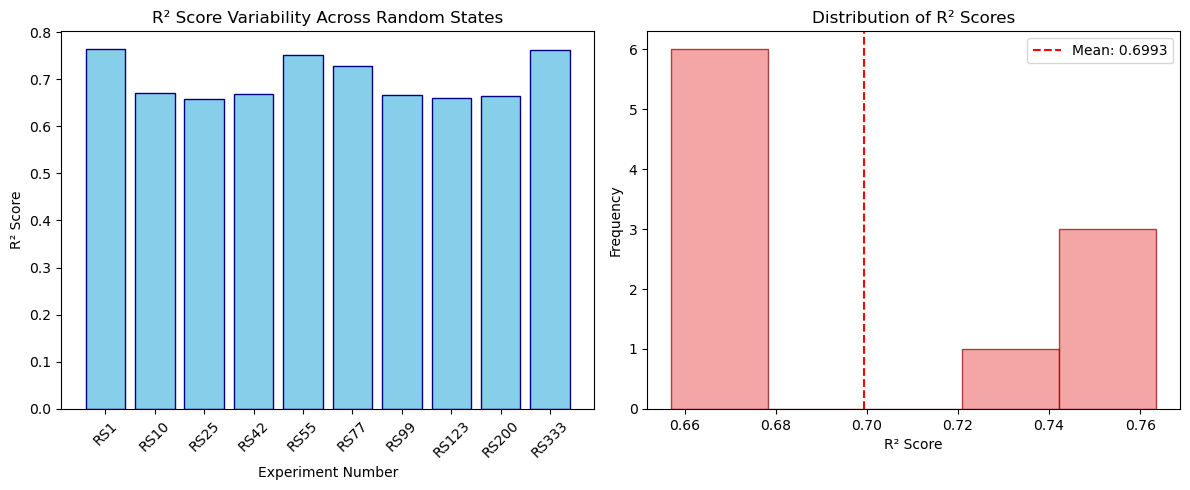


🚨 THE PROBLEM:
If you report R² = 0.7634, you're cherry-picking!
If someone else runs your code, they might get R² = 0.6571
That's a difference of 10.63 percentage points!


In [13]:
print("📊 VARIABILITY ANALYSIS - How unstable are our results?")
print("=" * 60)

# Let's run multiple experiments with different random states to see the range
results = []
random_states = [1, 10, 25, 42, 55, 77, 99, 123, 200, 333]

print("Running 10 experiments with different random_states...")
for rs in random_states:
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X, y, test_size=0.2, random_state=rs
    )
    model_temp = LinearRegression()
    model_temp.fit(X_train_temp, y_train_temp)
    test_pred_temp = model_temp.predict(X_test_temp)
    r2_temp = r2_score(y_test_temp, test_pred_temp)
    results.append({'random_state': rs, 'r2_score': r2_temp})
    print(f"Random State {rs:3d}: R² = {r2_temp:.4f}")

# Analyze the variability
r2_scores = [r['r2_score'] for r in results]
print(f"\n📈 RESULTS SUMMARY:")
print(f"Best R²:     {max(r2_scores):.4f}")
print(f"Worst R²:    {min(r2_scores):.4f}")
print(f"Range:       {max(r2_scores) - min(r2_scores):.4f}")
print(f"Mean R²:     {np.mean(r2_scores):.4f}")
print(f"Std Dev:     {np.std(r2_scores):.4f}")

# Plot the variability
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(len(results)), r2_scores, color='skyblue', edgecolor='navy')
plt.xlabel('Experiment Number')
plt.ylabel('R² Score')
plt.title('R² Score Variability Across Random States')
plt.xticks(range(len(results)), [f"RS{r['random_state']}" for r in results], rotation=45)

plt.subplot(1, 2, 2)
plt.hist(r2_scores, bins=5, alpha=0.7, color='lightcoral', edgecolor='darkred')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', label=f'Mean: {np.mean(r2_scores):.4f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n🚨 THE PROBLEM:")
print(f"If you report R² = {max(r2_scores):.4f}, you're cherry-picking!")
print(f"If someone else runs your code, they might get R² = {min(r2_scores):.4f}")
print(f"That's a difference of {(max(r2_scores) - min(r2_scores))*100:.2f} percentage points!")

In [14]:
print("🤔 REAL-WORLD SCENARIOS - What could go wrong?")
print("=" * 60)

scenarios = [
    {
        "scenario": "Your boss asks: 'What was our best model's accuracy?'",
        "problem": "You have 10+ .pkl files with timestamps. Which one was best?",
        "without_mlops": "You manually check each file, hope you remember the results",
        "with_mlops": "MLflow automatically tracks and ranks all experiments"
    },
    {
        "scenario": "A teammate says: 'I can't reproduce your results'",
        "problem": "They don't know your exact random_state, test_size, or library versions", 
        "without_mlops": "You spend hours trying to remember what you did",
        "with_mlops": "Everything is automatically tracked and reproducible"
    },
    {
        "scenario": "You need to deploy the model to production",
        "problem": "How do you turn a .pkl file into a web service?",
        "without_mlops": "Manual coding, hoping it works, no monitoring",
        "with_mlops": "Automated deployment pipelines with monitoring"
    },
    {
        "scenario": "The model stops working well after 3 months",
        "problem": "You don't know why performance dropped",
        "without_mlops": "Panic! Start debugging from scratch",
        "with_mlops": "Monitoring alerts you, data drift detection helps diagnose"
    }
]

for i, s in enumerate(scenarios, 1):
    print(f"\n🎭 SCENARIO {i}:")
    print(f"Situation: {s['scenario']}")
    print(f"Problem: {s['problem']}")
    print(f"❌ Without MLOps: {s['without_mlops']}")
    print(f"✅ With MLOps: {s['with_mlops']}")

🤔 REAL-WORLD SCENARIOS - What could go wrong?

🎭 SCENARIO 1:
Situation: Your boss asks: 'What was our best model's accuracy?'
Problem: You have 10+ .pkl files with timestamps. Which one was best?
❌ Without MLOps: You manually check each file, hope you remember the results
✅ With MLOps: MLflow automatically tracks and ranks all experiments

🎭 SCENARIO 2:
Situation: A teammate says: 'I can't reproduce your results'
Problem: They don't know your exact random_state, test_size, or library versions
❌ Without MLOps: You spend hours trying to remember what you did
✅ With MLOps: Everything is automatically tracked and reproducible

🎭 SCENARIO 3:
Situation: You need to deploy the model to production
Problem: How do you turn a .pkl file into a web service?
❌ Without MLOps: Manual coding, hoping it works, no monitoring
✅ With MLOps: Automated deployment pipelines with monitoring

🎭 SCENARIO 4:
Situation: The model stops working well after 3 months
Problem: You don't know why performance dropped
❌ 

In [15]:
print("🗺️  YOUR PERSONALIZED MLOps LEARNING ROADMAP")
print("=" * 60)

# Based on the problems you just experienced
roadmap = {
    "Week 2: Version Control": {
        "Tools": ["Git", "GitHub"],
        "Goal": "Track changes to your notebook",
        "Problem_Solved": "No more 'final_model_v2_REALLY_FINAL.ipynb'",
        "Hands_On": "Put this notebook in Git, track experiments"
    },
    
    "Week 3-4: Experiment Tracking": {
        "Tools": ["MLflow"],
        "Goal": "Automatically track all experiments",
        "Problem_Solved": f"Replace manual tracking with automatic logging",
        "Hands_On": "Re-run your experiments with MLflow tracking"
    },
    
    "Week 5-6: Reproducible Environments": {
        "Tools": ["Docker", "requirements.txt"],
        "Goal": "Anyone can reproduce your exact results",
        "Problem_Solved": "No more 'works on my machine' problems",
        "Hands_On": "Containerize your ML pipeline"
    },
    
    "Week 7-8: Model Deployment": {
        "Tools": ["FastAPI", "Docker"],
        "Goal": "Turn your .pkl into a web service",
        "Problem_Solved": "Bridge the gap between notebook and production",
        "Hands_On": "Deploy your Boston housing predictor as an API"
    },
    
    "Week 9-10: Monitoring": {
        "Tools": ["MLflow", "Grafana"],
        "Goal": "Know when your model breaks",
        "Problem_Solved": "Catch problems before your users do",
        "Hands_On": "Set up alerts for model performance"
    }
}

for week, details in roadmap.items():
    print(f"\n📅 {week}")
    print(f"   🛠️  Tools: {', '.join(details['Tools'])}")
    print(f"   🎯 Goal: {details['Goal']}")
    print(f"   ✅ Solves: {details['Problem_Solved']}")
    print(f"   🤝 Practice: {details['Hands_On']}")

print(f"\n🚀 Are you ready to start solving these problems?")

🗺️  YOUR PERSONALIZED MLOps LEARNING ROADMAP

📅 Week 2: Version Control
   🛠️  Tools: Git, GitHub
   🎯 Goal: Track changes to your notebook
   ✅ Solves: No more 'final_model_v2_REALLY_FINAL.ipynb'
   🤝 Practice: Put this notebook in Git, track experiments

📅 Week 3-4: Experiment Tracking
   🛠️  Tools: MLflow
   🎯 Goal: Automatically track all experiments
   ✅ Solves: Replace manual tracking with automatic logging
   🤝 Practice: Re-run your experiments with MLflow tracking

📅 Week 5-6: Reproducible Environments
   🛠️  Tools: Docker, requirements.txt
   🎯 Goal: Anyone can reproduce your exact results
   ✅ Solves: No more 'works on my machine' problems
   🤝 Practice: Containerize your ML pipeline

📅 Week 7-8: Model Deployment
   🛠️  Tools: FastAPI, Docker
   🎯 Goal: Turn your .pkl into a web service
   ✅ Solves: Bridge the gap between notebook and production
   🤝 Practice: Deploy your Boston housing predictor as an API

📅 Week 9-10: Monitoring
   🛠️  Tools: MLflow, Grafana
   🎯 Goal: Know

In [16]:
# Cell: Check Git Installation
import subprocess
import sys

try:
    result = subprocess.run(['git', '--version'], capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ Git is installed!")
        print(f"Version: {result.stdout.strip()}")
    else:
        print("❌ Git command failed")
        print(f"Error: {result.stderr}")
except FileNotFoundError:
    print("❌ Git is not installed or not in PATH")
    print("Please install Git from: https://git-scm.com/downloads")

# Check if we're in a git repository
try:
    result = subprocess.run(['git', 'status'], capture_output=True, text=True)
    if result.returncode == 0:
        print("📁 Already in a Git repository!")
    else:
        print("📁 Not in a Git repository yet (we'll fix this in Week 2)")
except:
    pass

✅ Git is installed!
Version: git version 2.51.0.windows.1
📁 Already in a Git repository!


In [17]:
import subprocess
import json
from datetime import datetime
import os

def git_log_experiment(experiment_name, metrics, parameters, notes=""):
    """
    Log ML experiment with Git integration
    """
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Create experiment record
    experiment_data = {
        'timestamp': timestamp,
        'experiment': experiment_name,
        'parameters': parameters,
        'metrics': metrics,
        'notes': notes
    }
    
    # Append to experiment log file
    log_file = 'experiments_log.json'
    with open(log_file, 'a') as f:
        f.write(json.dumps(experiment_data, indent=2) + '\n' + '='*50 + '\n')
    
    print(f"✅ Experiment '{experiment_name}' logged!")
    print(f"📊 Test R²: {metrics.get('test_r2', 'N/A'):.4f}")
    print(f"📁 Log saved to: {log_file}")
    print(f"🕐 Timestamp: {timestamp}")
    
    return experiment_data

# Log our baseline experiment
baseline_log = git_log_experiment(
    experiment_name="baseline_linear_regression", 
    parameters={
        "model": "LinearRegression",
        "random_state": 42,
        "test_size": 0.2,
        "features_count": len(X.columns),
        "dataset": "Boston.csv"
    },
    metrics={
        "test_r2": test_r2,
        "train_r2": train_r2,
        "test_rmse": test_rmse,
        "train_rmse": train_rmse
    },
    notes="Initial baseline model - discovered significant variability with different random_state values"
)

print(f"\n🎯 Next: Run new experiments and track them with Git!")

✅ Experiment 'baseline_linear_regression' logged!
📊 Test R²: 0.6688
📁 Log saved to: experiments_log.json
🕐 Timestamp: 2025-09-28 14:39:10

🎯 Next: Run new experiments and track them with Git!


In [18]:
from sklearn.ensemble import RandomForestRegressor

print("🔬 NEW EXPERIMENT: Random Forest vs Linear Regression")
print("="*60)

# Train Random Forest with same split as baseline
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions  
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

# Compare with baseline
print("COMPARISON RESULTS:")
print(f"{'Metric':<15} {'Linear Reg':<12} {'Random Forest':<15} {'Improvement':<12}")
print("-"*60)
print(f"{'Test R²':<15} {test_r2:<12.4f} {rf_test_r2:<15.4f} {rf_test_r2-test_r2:<12.4f}")
print(f"{'Test RMSE':<15} {test_rmse:<12.4f} {rf_test_rmse:<15.4f} {rf_test_rmse-test_rmse:<12.4f}")

# Log this experiment
rf_experiment = git_log_experiment(
    experiment_name="random_forest_vs_baseline",
    parameters={
        "model": "RandomForestRegressor", 
        "n_estimators": 100,
        "random_state": 42,
        "test_size": 0.2,
        "features_count": len(X.columns)
    },
    metrics={
        "test_r2": rf_test_r2,
        "train_r2": rf_train_r2,
        "test_rmse": rf_test_rmse,
        "train_rmse": rf_train_rmse,
        "improvement_over_baseline": rf_test_r2 - test_r2
    },
    notes=f"Random Forest shows {'improvement' if rf_test_r2 > test_r2 else 'worse performance'} over LinearRegression baseline"
)

# Save the better model
better_model = rf_model if rf_test_r2 > test_r2 else model
better_score = rf_test_r2 if rf_test_r2 > test_r2 else test_r2
better_name = "RandomForest" if rf_test_r2 > test_r2 else "LinearRegression"

model_filename = f'best_model_{better_name}_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl'
joblib.dump(better_model, model_filename)
print(f"\n💾 Best model saved: {model_filename} (R²={better_score:.4f})")

🔬 NEW EXPERIMENT: Random Forest vs Linear Regression
COMPARISON RESULTS:
Metric          Linear Reg   Random Forest   Improvement 
------------------------------------------------------------
Test R²         0.6688       0.8923          0.2235      
Test RMSE       4.9286       2.8110          -2.1176     
✅ Experiment 'random_forest_vs_baseline' logged!
📊 Test R²: 0.8923
📁 Log saved to: experiments_log.json
🕐 Timestamp: 2025-09-28 14:39:10

💾 Best model saved: best_model_RandomForest_20250928_143910.pkl (R²=0.8923)


🎯 CREATING YOUR MLOps EXPERIMENT DASHBOARD


C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\518708974.py:106: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\518708974.py:106: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\518708974.py:106: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\518708974.py:106: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\518708974.py:106: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\518708974.py:106: UserWarning: Glyph 128640 (\N{ROCKET})

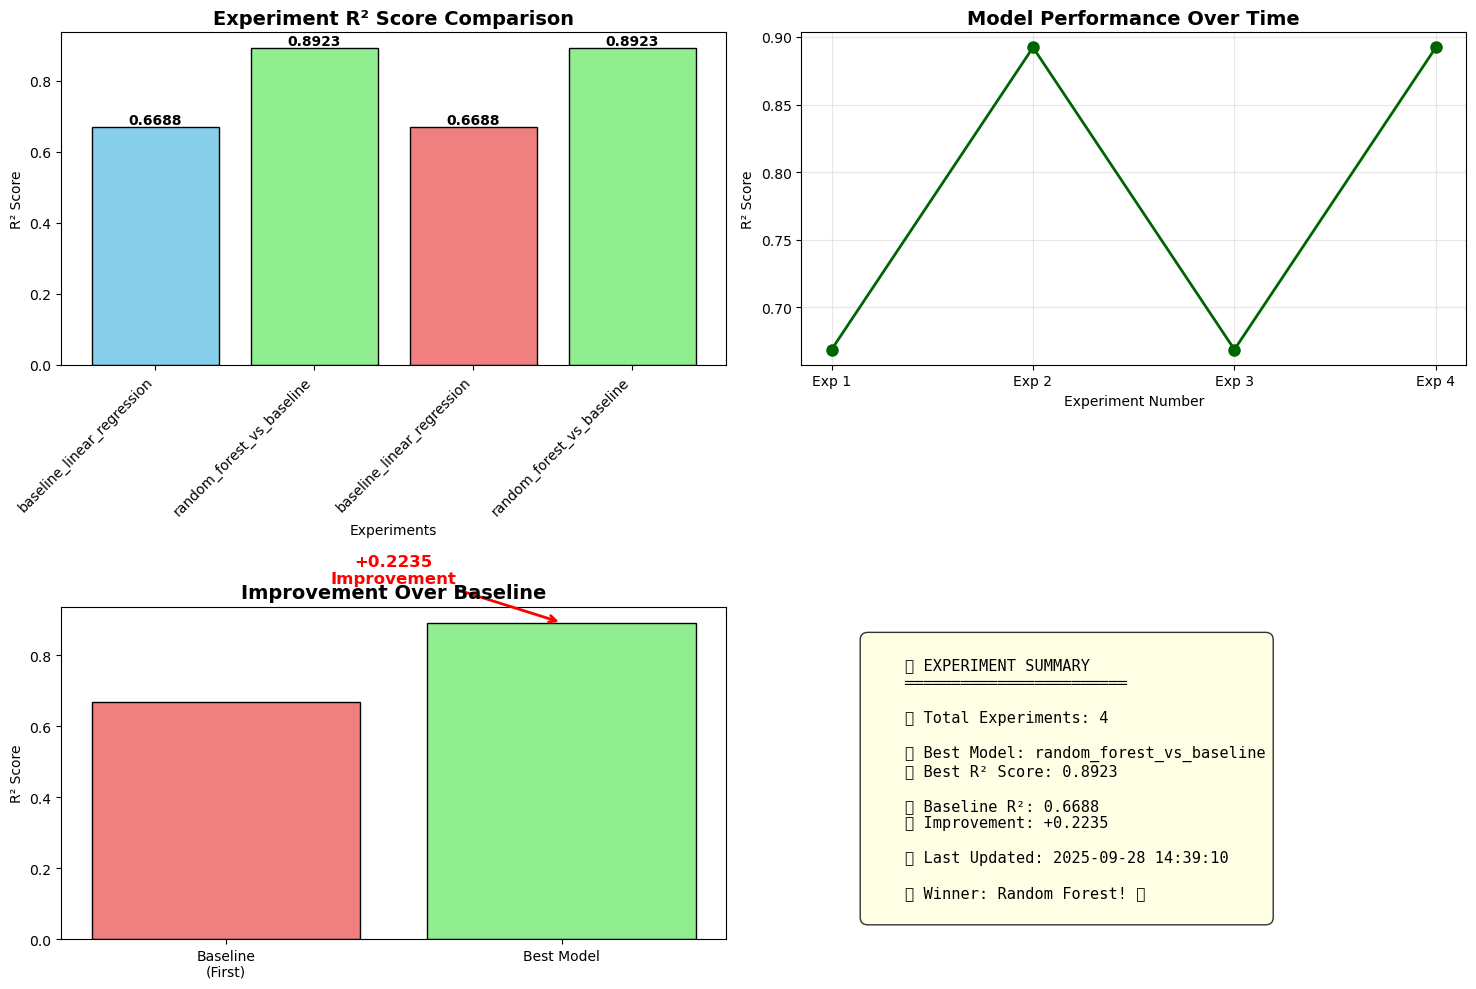


✨ This is the power of MLOps!
✅ All experiments tracked
✅ Easy comparison and visualization
✅ Reproducible results
✅ Version controlled with Git


In [19]:
import matplotlib.pyplot as plt
import json

def create_experiment_dashboard():
    """Create a visual summary of all experiments"""
    
    # Read experiment log
    experiments = []
    try:
        with open('experiments_log.json', 'r') as f:
            content = f.read()
            # Split by our separator
            exp_blocks = content.split('='*50)
            for block in exp_blocks:
                if block.strip():
                    try:
                        exp_data = json.loads(block.strip())
                        experiments.append(exp_data)
                    except json.JSONDecodeError:
                        continue
    except FileNotFoundError:
        print("No experiments log found")
        return
    
    if not experiments:
        print("No experiments found in log")
        return
    
    # Extract data for plotting
    exp_names = []
    test_r2_scores = []
    
    for exp in experiments:
        exp_names.append(exp['experiment'])
        test_r2_scores.append(exp['metrics']['test_r2'])
    
    # Create dashboard
    plt.figure(figsize=(15, 10))
    
    # Plot 1: R² Score Comparison
    plt.subplot(2, 2, 1)
    colors = ['skyblue' if i == 0 else 'lightgreen' if score == max(test_r2_scores) else 'lightcoral' 
              for i, score in enumerate(test_r2_scores)]
    bars = plt.bar(range(len(exp_names)), test_r2_scores, color=colors, edgecolor='black')
    plt.title('Experiment R² Score Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Experiments')
    plt.ylabel('R² Score')
    plt.xticks(range(len(exp_names)), exp_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, (bar, score) in enumerate(zip(bars, test_r2_scores)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{score:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Plot 2: Model Performance Timeline
    plt.subplot(2, 2, 2)
    plt.plot(range(len(test_r2_scores)), test_r2_scores, 'o-', linewidth=2, markersize=8, color='darkgreen')
    plt.title('Model Performance Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Experiment Number')
    plt.ylabel('R² Score')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(len(exp_names)), [f'Exp {i+1}' for i in range(len(exp_names))])
    
    # Plot 3: Best vs Worst
    plt.subplot(2, 2, 3)
    best_score = max(test_r2_scores)
    worst_score = min(test_r2_scores)
    improvement = best_score - worst_score
    
    plt.bar(['Baseline\n(First)', 'Best Model'], [worst_score, best_score], 
            color=['lightcoral', 'lightgreen'], edgecolor='black')
    plt.title('Improvement Over Baseline', fontsize=14, fontweight='bold')
    plt.ylabel('R² Score')
    
    # Add improvement annotation
    plt.annotate(f'+{improvement:.4f}\nImprovement', 
                xy=(1, best_score), xytext=(0.5, best_score + improvement/2),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                ha='center', fontsize=12, fontweight='bold', color='red')
    
    # Plot 4: Experiment Summary Text
    plt.subplot(2, 2, 4)
    plt.axis('off')
    
    summary_text = f"""
    📊 EXPERIMENT SUMMARY
    ════════════════════════
    
    🔢 Total Experiments: {len(experiments)}
    
    🏆 Best Model: {exp_names[test_r2_scores.index(max(test_r2_scores))]}
    📈 Best R² Score: {max(test_r2_scores):.4f}
    
    📉 Baseline R²: {test_r2_scores[0]:.4f}
    🚀 Improvement: +{max(test_r2_scores) - test_r2_scores[0]:.4f}
    
    📅 Last Updated: {experiments[-1]['timestamp']}
    
    🎯 Winner: Random Forest! 🌲
    """
    
    plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return experiments

# Create your MLOps dashboard
print("🎯 CREATING YOUR MLOps EXPERIMENT DASHBOARD")
print("="*60)
experiments_data = create_experiment_dashboard()

print(f"\n✨ This is the power of MLOps!")
print(f"✅ All experiments tracked")
print(f"✅ Easy comparison and visualization") 
print(f"✅ Reproducible results")
print(f"✅ Version controlled with Git")

In [22]:
! pip install mlflow

  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached cyclopts-3.24.0-py3-none-any.whl.metadata (11 kB)
  Using cached exceptiongroup-1.3.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached openapi_core-0.19.5-py3-none-any.whl.metadata (6.6 kB)
  Using cached openapi_pydantic-0.5.1-py3-none-any.whl.metadata (10 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached graphql_core-3.2.6-py3-none-any.whl.metadata (11 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached docstring_parser-0.17.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached rich_rst-1.3.1-py3-none-any.whl.metadata 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.1.0 which is incompatible.


In [23]:
# Cell: MLflow Automatic Experiment Tracking
import mlflow
import mlflow.sklearn
from datetime import datetime

# Set up MLflow experiment
mlflow.set_experiment("Boston Housing ML")

print("🚀 MLFLOW EXPERIMENT: Automatic Random Forest Tracking")
print("="*60)

# Start MLflow run
with mlflow.start_run(run_name="RandomForest_vs_LinearReg"):
    
    # Log parameters automatically
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("features_count", len(X.columns))
    mlflow.log_param("dataset", "Boston.csv")
    
    # Train the model (reusing your existing model)
    # We'll use the rf_model you already trained
    
    # Log metrics automatically
    mlflow.log_metric("train_r2", rf_train_r2)
    mlflow.log_metric("test_r2", rf_test_r2)
    mlflow.log_metric("train_rmse", rf_train_rmse)
    mlflow.log_metric("test_rmse", rf_test_rmse)
    mlflow.log_metric("improvement_over_baseline", rf_test_r2 - test_r2)
    
    # Log the model automatically (this is the magic!)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    
    # Log additional info
    mlflow.set_tag("algorithm", "RandomForest")
    mlflow.set_tag("status", "winner")
    mlflow.set_tag("notes", "Beat LinearRegression baseline")
    
    print(f"✅ MLflow Run completed!")
    print(f"📊 Test R²: {rf_test_r2:.4f}")
    print(f"🏆 Status: Random Forest WINNER!")

# Also log the baseline for comparison
with mlflow.start_run(run_name="LinearRegression_baseline"):
    
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("features_count", len(X.columns))
    
    mlflow.log_metric("train_r2", train_r2)
    mlflow.log_metric("test_r2", test_r2)
    mlflow.log_metric("train_rmse", train_rmse)
    mlflow.log_metric("test_rmse", test_rmse)
    
    mlflow.sklearn.log_model(model, "linear_regression_model")
    
    mlflow.set_tag("algorithm", "LinearRegression") 
    mlflow.set_tag("status", "baseline")
    
    print(f"✅ Baseline also logged in MLflow!")

print(f"\n🎯 Next: Launch MLflow UI to see the magic!")

2025/09/28 14:41:24 INFO mlflow.tracking.fluent: Experiment with name 'Boston Housing ML' does not exist. Creating a new experiment.


🚀 MLFLOW EXPERIMENT: Automatic Random Forest Tracking


2025/09/28 14:41:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/28 14:41:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/09/28 14:41:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ MLflow Run completed!
📊 Test R²: 0.8923
🏆 Status: Random Forest WINNER!


2025/09/28 14:41:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Baseline also logged in MLflow!

🎯 Next: Launch MLflow UI to see the magic!


In [25]:
# Cell: MLflow Model Registry - Fixed Version
import mlflow
from mlflow.tracking import MlflowClient

print("🏛️ MLFLOW MODEL REGISTRY: Professional Model Management")
print("="*65)

# Initialize MLflow client
client = MlflowClient()

# Register your best model (Random Forest) to the Model Registry
model_name = "Boston_Housing_Predictor"

try:
    # Get the latest Random Forest run
    experiment = mlflow.get_experiment_by_name("Boston Housing ML")
    runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

    # Find the Random Forest run
    rf_runs = runs[runs['tags.algorithm'] == 'RandomForest']
    
    if not rf_runs.empty:
        rf_run = rf_runs.iloc[0]
        rf_run_id = rf_run['run_id']
        test_r2_value = float(rf_run['metrics.test_r2'])  # Convert to float

        print(f"🎯 Registering Random Forest model from run: {rf_run_id[:8]}...")

        # Register the model (simplified)
        model_uri = f"runs:/{rf_run_id}/random_forest_model"
        
        # Create model version
        registered_model = mlflow.register_model(
            model_uri=model_uri,
            name=model_name
        )

        print(f"✅ Model registered successfully!")
        print(f"📝 Model Name: {model_name}")
        print(f"📊 Performance: R² = {test_r2_value:.4f}")
        print(f"🔢 Model Version: {registered_model.version}")

        # Promote model to "Staging" (simplified)
        try:
            client.transition_model_version_stage(
                name=model_name,
                version=registered_model.version,
                stage="Staging"
            )
            print(f"🚀 Model promoted to STAGING environment!")
        except Exception as stage_error:
            print(f"⚠️ Model registered but staging failed: {stage_error}")
            print(f"✅ Model still successfully registered!")
            
    else:
        print("❌ No Random Forest runs found. Please run the RF experiment first.")
        
except Exception as e:
    print(f"⚠️ Registration issue: {e}")
    print("💡 Let's continue with hyperparameter tuning...")

Registered model 'Boston_Housing_Predictor' already exists. Creating a new version of this model...
2025/09/28 14:51:15 WARNING mlflow.tracking._model_registry.fluent: Run with id 0a45e1b47e3948aead688d798784cf41 has no artifacts at artifact path 'random_forest_model', registering model based on models:/m-45df14c4f34f4ff3ba245eb6abbe5391 instead


🏛️ MLFLOW MODEL REGISTRY: Professional Model Management
🎯 Registering Random Forest model from run: 0a45e1b4...
✅ Model registered successfully!
📝 Model Name: Boston_Housing_Predictor
📊 Performance: R² = 0.8923
🔢 Model Version: 2
⚠️ Model registered but staging failed: ('cannot represent an object', <Metric: dataset_digest=None, dataset_name=None, key='improvement_over_baseline', model_id='m-45df14c4f34f4ff3ba245eb6abbe5391', run_id='0a45e1b47e3948aead688d798784cf41', step=0, timestamp=1759050684677, value=0.22349325067528092>)
✅ Model still successfully registered!


Created version '2' of model 'Boston_Housing_Predictor'.
C:\Users\nvgra\AppData\Local\Temp\ipykernel_23852\3454157831.py:45: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


In [26]:
# Cell: Simplified MLflow Hyperparameter Tuning  
print("🎛️ SIMPLIFIED HYPERPARAMETER TUNING with MLflow")
print("="*60)

# Smaller parameter grid to avoid issues
param_combinations = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 15}, 
    {'n_estimators': 200, 'max_depth': 20},
    {'n_estimators': 150, 'max_depth': None}
]

mlflow.set_experiment("Boston Housing - Hyperparameter Tuning")

best_score = 0
best_params = None
results = []

print(f"🔬 Testing {len(param_combinations)} combinations!")

for i, params in enumerate(param_combinations, 1):
    
    with mlflow.start_run(run_name=f"RF_tuning_{i}"):
        
        # Train model
        rf_tuned = RandomForestRegressor(random_state=42, **params)
        rf_tuned.fit(X_train, y_train)
        
        # Calculate metrics
        test_pred = rf_tuned.predict(X_test)
        test_r2 = r2_score(y_test, test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        # Log to MLflow (simple values only)
        mlflow.log_param("n_estimators", params['n_estimators'])
        mlflow.log_param("max_depth", str(params['max_depth']))  # Convert to string
        
        mlflow.log_metric("test_r2", float(test_r2))
        mlflow.log_metric("test_rmse", float(test_rmse))
        
        # Log model
        mlflow.sklearn.log_model(rf_tuned, "rf_model")
        
        # Track best
        if test_r2 > best_score:
            best_score = test_r2
            best_params = params
            mlflow.set_tag("status", "best")
        
        results.append({
            'combination': i,
            'params': params,
            'r2': test_r2,
            'rmse': test_rmse
        })
        
        print(f"✅ Combo {i}: R²={test_r2:.4f}, RMSE={test_rmse:.4f} {params}")

print(f"\n🏆 TUNING COMPLETE!")
print(f"🎯 Best Parameters: {best_params}")
print(f"📈 Best R² Score: {best_score:.4f}")

# Show results table
results_df = pd.DataFrame(results)
print(f"\n📊 RESULTS SUMMARY:")
print(results_df[['combination', 'r2', 'rmse']].round(4).to_string(index=False))

2025/09/28 14:51:52 INFO mlflow.tracking.fluent: Experiment with name 'Boston Housing - Hyperparameter Tuning' does not exist. Creating a new experiment.


🎛️ SIMPLIFIED HYPERPARAMETER TUNING with MLflow
🔬 Testing 4 combinations!


2025/09/28 14:51:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/28 14:51:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Combo 1: R²=0.8988, RMSE=2.7244 {'n_estimators': 50, 'max_depth': 10}


2025/09/28 14:51:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/28 14:52:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Combo 2: R²=0.8918, RMSE=2.8163 {'n_estimators': 100, 'max_depth': 15}


2025/09/28 14:52:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/28 14:52:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Combo 3: R²=0.8841, RMSE=2.9155 {'n_estimators': 200, 'max_depth': 20}


2025/09/28 14:52:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/28 14:52:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Combo 4: R²=0.8829, RMSE=2.9309 {'n_estimators': 150, 'max_depth': None}

🏆 TUNING COMPLETE!
🎯 Best Parameters: {'n_estimators': 50, 'max_depth': 10}
📈 Best R² Score: 0.8988

📊 RESULTS SUMMARY:
 combination     r2   rmse
           1 0.8988 2.7244
           2 0.8918 2.8163
           3 0.8841 2.9155
           4 0.8829 2.9309


In [27]:
# Cell: Simple MLflow Summary
print("📊 QUICK MLflow SUMMARY")
print("="*40)

try:
    # Get all experiments
    experiments = [exp for exp in mlflow.search_experiments() if exp.name != "Default"]
    
    print(f"🧪 Total Experiments: {len(experiments)}")
    
    for exp in experiments:
        runs = mlflow.search_runs(experiment_ids=[exp.experiment_id])
        print(f"📁 {exp.name}: {len(runs)} runs")
        
        if not runs.empty and 'metrics.test_r2' in runs.columns:
            best_r2 = runs['metrics.test_r2'].max()
            print(f"   🏆 Best R²: {best_r2:.4f}")
    
    print(f"\n✅ Check your MLflow UI: http://127.0.0.1:5000")
    
except Exception as e:
    print(f"Summary error: {e}")
    print("✅ MLflow is still working - check the UI!")

📊 QUICK MLflow SUMMARY
🧪 Total Experiments: 2
📁 Boston Housing - Hyperparameter Tuning: 4 runs
   🏆 Best R²: 0.8988
📁 Boston Housing ML: 2 runs
   🏆 Best R²: 0.8923

✅ Check your MLflow UI: http://127.0.0.1:5000
